## 2. Edge Detection
### 2.2. Laplacian of Gaussian

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

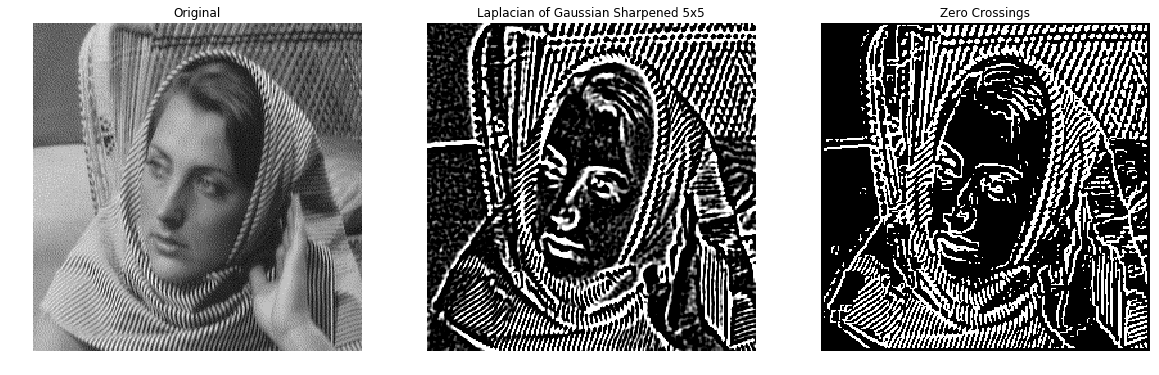

In [18]:
plt.figure(figsize=(20, 20))

# Original clean woman image (in Gray)
img = cv2.imread('./images/woman.png', cv2.IMREAD_GRAYSCALE)

# Filter woman image using Gaussian Filter 5x5 with 0 variance
img_gaussian = cv2.GaussianBlur(img, (5, 5), 0)

# Laplacian edge detector 5x5 of woman image
img_laplacian = cv2.Laplacian(img_gaussian, cv2.CV_8U, ksize=5)

n, m = img_laplacian.shape
thresh = 0.7 * np.max(img_laplacian)
img_threshold = np.zeros(shape = (n, m))

for i in range(2, n - 2):
    for j in range(2, m - 2):
        patch = img_laplacian[i-2:i+3,j-2:j+3]
        pixel = img_laplacian[i, j]
        max_pixel = patch.max()
        min_pixel = patch.min()
        
        if pixel > 0:
            zero_cross = True if min_pixel < 0 else False
        else: 
            zero_cross = True if max_pixel > 0 else False
            
        if zero_cross and (max_pixel - min_pixel) > thresh:
            img_threshold[i, j] = 255
        else:
            img_threshold[i, j] = 0

            
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.axis('off')
plt.subplot(132), plt.imshow(img_laplacian, cmap='gray')
plt.title('Laplacian of Gaussian Sharpened 5x5'), plt.axis('off')
plt.subplot(133), plt.imshow(img_threshold, cmap='gray')
plt.title('Zero Crossings'), plt.axis('off')

# Display all images
plt.show()